# Original Setup of Kendall Tau (already done)

In [1]:
def g_old(z, k):
    return (1+z)**k

def g_new(z, k):
    Z = z+1
    Z_c = 3.5
    return Z**k/(1+Z/Z_c)**k

def L_lim1(F_lim, z_i, d_Li, g=g_old, k=0):
    return (F_lim*1e-26)*4*math.pi*(d_Li*3.08567758e25)**2/g(z_i, k)

def test(F_lim, z_i, d_Li, g=g_old, k=0):
    return (8e26/0.15)*F_lim*z_i**2.4

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

def sort_by_first(A, B): #SORT USING Z!
    list1, list2 = zip(*sorted(zip(A, B)))
    return list(list1), list(list2)

#original setup of Kendall Tau, using a generic F_lim,z --> L converter

def kendall_tau(L, z, F_lim, srted=False, func=L_lim1):
    
    #if necessary, sort by z while keeping reference to L
    if not srted:
        z, L = sort_by_first(z, L)
        
    R = []
    E = []
    V = []
    
    for i in range(len(L)):
        higher = 0
        lower = 0
        
        for j in range(0, i): #since sorted by now, only j < i has z_j < z_i
            if(L[j] >= func(F_lim, z[i]) and z[j] <= z[i]): #associated set requirements
                if(L[j] > L[i]):
                    higher += 1
                else:
                    lower += 1
        
        R.append((lower+1)/(higher+lower+1))
        E.append(0.5)
        V.append(1/12)
    
    numer = sum(R) - sum(E)
    denom = (sum(V))**0.5
    return numer/denom

In [3]:
import csv

frb, telescope, snr, f_p, d_L, z = [], [], [], [], [], []

with open('frb.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
            continue
        line_count += 1
        if float(row[2]) > 6:
            frb.append(row[0])
            telescope.append(row[1])
            snr.append(float(row[2]))
            f_p.append(float(row[3]))
            d_L.append(float(row[4]))
            z.append(float(row[5]))
        '''
        else: 
            frb.append(row[0])
            telescope.append(row[1])
            snr.append(6)
            f_p.append(float(row[3]))
            d_L.append(float(row[4]))
            z.append(float(row[5]))
        '''
    print(f'Processed {line_count} lines.')

Processed 64 lines.


In [4]:
#Deriving New Parameters
f_lim = []
L_p = []
L_plim = []

for i in range(len(f_p)):
    f_lim_i = f_p[i]/(snr[i])
    L_p_i = (f_p[i]*1e-26)*4*math.pi*(d_L[i]*3.08567758e25)**2
    L_plim_i = (f_lim_i*1e-26)*4*math.pi*(d_L[i]*3.08567758e25)**2
    f_lim.append(f_lim_i)
    L_p.append(L_p_i)
    L_plim.append(L_plim_i)

In [5]:
telescope = [telescope[i].lower() for i in range(len(telescope))] #removing the uppercase Parkes
set(telescope)

{'askap', 'parkes'}

In [6]:
L_cutoffs = []
for i in range(len(z)):
    L_cutoffs.append(L_lim1(0.15, z[i], d_L[i], g=g_old, k=0))

z_throwaway, L_cutoffs = sort_by_first(z, L_cutoffs)

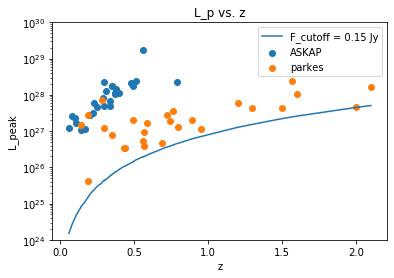

In [7]:
fig, ax = plt.subplots()
plt.yscale('log')
ax.scatter(z[:27], L_p[:27], label='ASKAP')
ax.scatter(z[27:], L_p[27:], label='parkes')
#ax.scatter(z[:27], L_p[:27], label='ASKAP')
#ax.scatter(z[27:35], L_p[27:35], label='CHIME/FRB')
#ax.scatter(z[35:], L_p[35:], label='parkes')
ax.plot(z_throwaway, L_cutoffs, label='F_cutoff = 0.15 Jy')
ax.set_ylim([1e24, 1e30])
ax.set_xlabel('z')
ax.set_ylabel('L_peak')
ax.set_title('L_p vs. z')
ax.legend()

# new format kendall tau
### The new format is using d_L instead of a fake model function that approximates the limit luminosity

In [9]:
def kt_newform(L, z, F_lim, d_L, g=g_old, k=0, func=L_lim1):
    
    #if necessary, sort by z while keeping reference to L
    z, L = sort_by_first(z, L)
        
    R = []
    E = []
    V = []
    
    #####temporary measure#######
    #N = []
    
    for i in range(len(L)):
        higher = 0
        lower = 0
        
        
        #####temporary measure#######
        #N_i = []
        
        for j in range(0, i): #since sorted by now, only j < i has z_j < z_i
            if(L[j] >= func(F_lim, z[i], d_L[i], g=g, k=k) and z[j] <= z[i]): #associated set requirements
                
                #####temporary measure#######
                #N_i.append(j)
                
                if(L[j] > L[i]):
                    higher += 1
                else:
                    lower += 1
        
        #####temporary measure#######
        #N.append(N_i)
        
        R.append((lower+1)/(higher+lower+1))
        E.append(0.5)
        V.append(1/12)
    
    numer = sum(R) - sum(E)
    denom = (sum(V))**0.5
    return numer/denom #, N

In [10]:
kt_newform(L_p, z, 0.15, d_L)

2.417253639900544

In [11]:
K = 2.26

L_cutoffs = []
for i in range(len(z)):
    L_cutoffs.append(L_lim1(0.15, z[i], d_L[i], g=g_old, k=K))

z_throwaway, L_cutoffs = sort_by_first(z, L_cutoffs)

In [12]:
def new_L(L, z, g=g_old, k=0):
    return [L[i]/g(z[i], k) for i in range(len(L))]

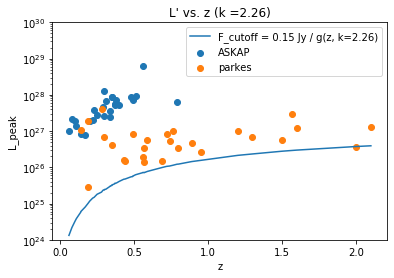

In [13]:
fig, ax = plt.subplots()
plt.yscale('log')
ax.scatter(z[:27], new_L(L_p[:27], z[:27], k=K), label='ASKAP')
ax.scatter(z[27:], new_L(L_p[27:], z[27:], k=K), label='parkes')
#ax.scatter(z[:27], L_p[:27], label='ASKAP')
#ax.scatter(z[27:35], L_p[27:35], label='CHIME/FRB')
#ax.scatter(z[35:], L_p[35:], label='parkes')
ax.plot(z_throwaway, L_cutoffs, label='F_cutoff = 0.15 Jy / g(z, k=' + str(K) + ")")
ax.set_ylim([1e24, 1e30])
ax.set_xlabel('z')
ax.set_ylabel('L_peak')
ax.set_title('L\' vs. z (k =' + str(K) + ')')
ax.legend()

In [14]:
def new_L(L, z, k=0, g=g_old):
    return [L[i]/g(z[i], k) for i in range(len(L))]

def tau_k(L_p, z, k, F_lim, d_L, func=L_lim1, g=g_old):
    L_new = new_L(L_p, z, k=k, g=g)
    return kt_newform(L_new, z, F_lim, d_L, func=func)

In [15]:
#plot tau for multiple values of k
k_min = -1
k_max = 7
dk = 0.01

#the current k value
k = k_min

#list of k, tau
list_k = []
list_t = []

k1 = k_min #k closest to tau = 1
kn1 = k_min #k closest to tau = -1
k0 = k_min #k closest to t=0

dif1 = 1e300 #smallest distance so far to tau = 1
difn1 = 1e300 #smallest distance so far to tau = -1
dif0 = 1e300

while(k <= k_max):
    list_k.append(k)
    t_k = tau_k(L_p, z, k, 0.15, d_L)
    list_t.append(t_k)
    
    if(abs(t_k-1) < dif1):
        dif1 = abs(t_k-1)
        k1 = k
    if(abs(t_k+1) < difn1):
        difn1 = abs(t_k+1)
        kn1 = k
    if(abs(t_k) < dif0):
        dif0 = abs(t_k)
        k0 = k
    
    k += dk

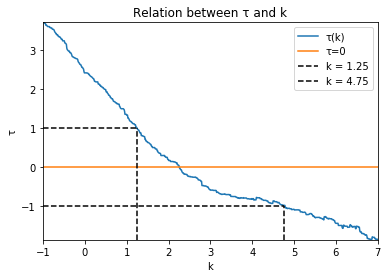

In [16]:
YMAX, YMIN = max(list_t), min(list_t)
XMAX, XMIN = k_max, k_min
MAR = 0 #margin

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(list_k, list_t, label='τ(k)')
ax.plot(list_k, [0 for i in range(len(list_k))], label='τ=0')
ax.plot([k1 for i in range(11)], [YMIN+(1-YMIN)*i/10 for i in range(11)], color='black', linestyle='--', label='k = 1.25')
ax.plot([kn1 for i in range(11)], [YMIN+(-1-YMIN)*i/10 for i in range(11)], color='black', linestyle='--', label='k = 4.75')
ax.plot([XMIN + (k1-XMIN)*i/10 for i in range(11)],[1 for i in range(11)], color='black', linestyle='--')
ax.plot([XMIN + (kn1-XMIN)*i/10 for i in range(11)],[-1 for i in range(11)], color='black', linestyle='--')
ax.set_ylim([YMIN-MAR, YMAX+MAR])
ax.set_xlim([XMIN-MAR, XMAX+MAR])
ax.set_xlabel('k')  # Add an x-label to the axes.
ax.set_ylabel('τ')  # Add a y-label to the axes.
ax.plot()

ax.set_title("Relation between τ and k")  # Add a title to the axes.
ax.legend()  # Add a legend.

# Doing L_lim, L_{p, lim} now

In [18]:
def set_to_one(x):
    return (x if x >= 1 else 1)

def methods(Llim, snr, method=True, X = 10): #True = X/(S/N), #False = (SNR-X)
    if not method:
        return [Llim[i] * snr[i]/set_to_one(snr[i]-X) for i in range(len(Llim))]
    else: # X/(S/N)
        return [Llim[i]*X for i in range(len(Llim))]

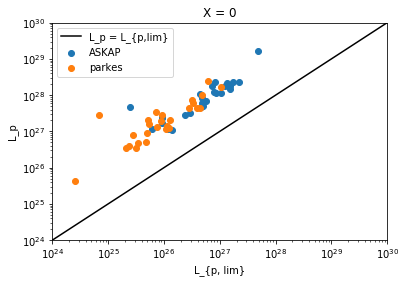

In [46]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xscale('log')
ax.scatter(L_plim[:27], L_p[:27], label='ASKAP')
ax.scatter(L_plim[27:], L_p[27:], label='parkes')
ax.plot([1e20, 1e32], [1e20, 1e32], label='L_p = L_{p,lim}', color='black')
ax.set_xlim([1e24, 1e30])
ax.set_ylim([1e24, 1e30])
ax.set_xlabel('L_{p, lim}')
ax.set_ylabel('L_p')
ax.set_title('X = 0')
ax.legend()
plt.show()

In [150]:
nLplim = methods(L_plim, snr, X=6)

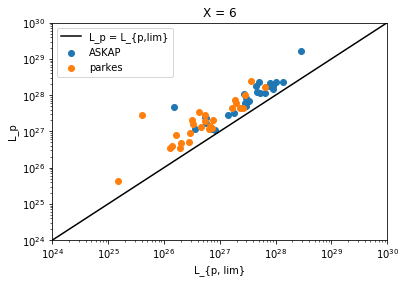

In [155]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xscale('log')
ax.scatter(nLplim[:27], L_p[:27], label='ASKAP')
ax.scatter(nLplim[27:], L_p[27:], label='parkes')
ax.plot([1e20, 1e32], [1e20, 1e32], label='L_p = L_{p,lim}', color='black')
ax.set_xlim([1e24, 1e30])
ax.set_ylim([1e24, 1e30])
ax.set_xlabel('L_{p, lim}')
ax.set_ylabel('L_p')
ax.set_title('X = 6')
ax.legend()
plt.show()

In [156]:
def L_lim2(F_lim, L_plimi):
    return L_plimi

#def new_L(L, z, k=0, g=g_old):
#    return [L[i]/g(z[i], k) for i in range(len(L))]


def tau_k2(L_p, L_plim, k, F_lim, func=L_lim2, g=g_old):
    L_new = new_L(L_p, z, k=k, g=g)
    L_pnew = new_L(L_plim, z, k=k, g=g)
    return kendall_tau(L_new, L_pnew, F_lim, func=func)

In [157]:
#plot tau for multiple values of k
k_min = -20
k_max = 20
dk = 0.01

#the current k value
k = k_min

#list of k, tau
list_k = []
list_t = []

k1 = k_min #k closest to tau = 1
kn1 = k_min #k closest to tau = -1
k0 = k_min #k closest to t=0

dif1 = 1e300 #smallest distance so far to tau = 1
difn1 = 1e300 #smallest distance so far to tau = -1
dif0 = 1e300

while(k <= k_max):
    list_k.append(k)
    t_k = tau_k2(L_p, nLplim, k, 0.15)
    list_t.append(t_k)
    
    if(abs(t_k-1) < dif1):
        dif1 = abs(t_k-1)
        k1 = k
    if(abs(t_k+1) < difn1):
        difn1 = abs(t_k+1)
        kn1 = k
    if(abs(t_k) < dif0):
        dif0 = abs(t_k)
        k0 = k
    
    k += dk

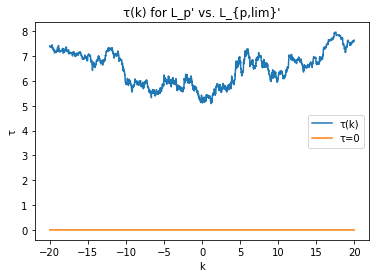

In [158]:
YMAX, YMIN = max(list_t), min(list_t)
XMAX, XMIN = k_max, k_min
MAR = 0 #margin

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(list_k, list_t, label='τ(k)')
ax.plot(list_k, [0 for i in range(len(list_k))], label='τ=0')
#ax.plot([k1 for i in range(11)], [YMIN+(1-YMIN)*i/10 for i in range(11)], color='black', linestyle='--', label='k = 1.25')
#ax.plot([kn1 for i in range(11)], [YMIN+(-1-YMIN)*i/10 for i in range(11)], color='black', linestyle='--', label='k = 4.75')
#ax.plot([XMIN + (k1-XMIN)*i/10 for i in range(11)],[1 for i in range(11)], color='black', linestyle='--')
#ax.plot([XMIN + (kn1-XMIN)*i/10 for i in range(11)],[-1 for i in range(11)], color='black', linestyle='--')
#ax.set_ylim([YMIN-MAR, YMAX+MAR])
#ax.set_xlim([XMIN-MAR, XMAX+MAR])
ax.set_xlabel('k')  # Add an x-label to the axes.
ax.set_ylabel('τ')  # Add a y-label to the axes.
ax.plot()

ax.set_title("τ(k) for L_p\' vs. L_{p,lim}\'")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [134]:
kendall_tau(L_p, nLplim, 0.15, func=L_lim2)

1.512560193167494

In [135]:
L_new = new_L(L_p, z, k=2.9)
L_pnew = new_L(nLplim, z, k=2.9)

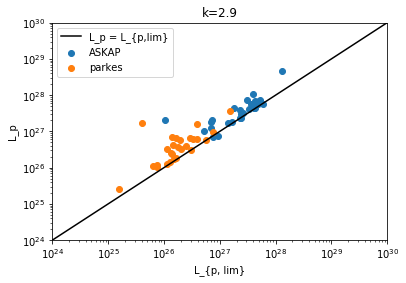

In [136]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xscale('log')
ax.scatter(L_pnew[:27], L_new[:27], label='ASKAP')
ax.scatter(L_pnew[27:], L_new[27:], label='parkes')
ax.plot([1e20, 1e32], [1e20, 1e32], label='L_p = L_{p,lim}', color='black')
ax.set_xlim([1e24, 1e30])
ax.set_ylim([1e24, 1e30])
ax.set_xlabel('L_{p, lim}')
ax.set_ylabel('L_p')
ax.set_title('k=2.9')
ax.legend()
plt.show()